Install all dependencies    

In [3]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
warnings.filterwarnings('ignore')

In [5]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [6]:
# =============================================================================
# STEP 1: DATA LOADING AND EXPLORATION
# =============================================================================
def load_and_explore_data():
    """
    STEP 1: Load and perform initial exploration of the sales data
    
    This function:
    - Loads the sales_data.csv file
    - Displays basic information about the dataset
    - Shows data types, missing values, and basic statistics
    - Returns the loaded DataFrame for further analysis
    
    Returns:
        pandas.DataFrame: Loaded and explored sales data
    """
    print("=== STEP 1: DATA LOADING AND EXPLORATION ===")
    print("Loading sales data from 'sales_data.csv'...")
    
    # Load the data
    df = pd.read_csv('sales_data.csv')
    
    # Display basic dataset information
    print(f"Dataset shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print("\nFirst few rows:")
    print(df.head())
    
    print("\nData types:")
    print(df.dtypes)
    
    print("\nMissing values:")
    print(df.isnull().sum())
    
    print("\nBasic statistics:")
    print(df.describe())
    
    print("✓ Step 1 Complete: Data loaded and explored successfully")
    return df

In [7]:
# =============================================================================
# STEP 2: CUSTOMER DEMOGRAPHICS ANALYSIS
# =============================================================================
def customer_demographics_analysis(df):
    """
    STEP 2: Analyze customer demographics and behavior patterns
    
    This function:
    - Analyzes customer age distribution and statistics
    - Compares sales performance by gender
    - Examines sales patterns across age groups
    - Creates visualizations for customer demographics
    - Saves results to 'customer_demographics.png'
    
    Args:
        df (pandas.DataFrame): Sales data DataFrame
        
    Returns:
        tuple: (gender_sales, age_group_sales) - Analysis results
    """
    print("\n=== STEP 2: CUSTOMER DEMOGRAPHICS ANALYSIS ===")
    print("Analyzing customer demographics and behavior patterns...")
    
    # Age analysis
    print("\nCustomer Age Distribution:")
    print(f"Average Age: {df['Customer_Age'].mean():.1f}")
    print(f"Age Range: {df['Customer_Age'].min()} - {df['Customer_Age'].max()}")
    print(f"Most Common Age Group: {df['Age_Group'].mode()[0]}")
    
    # Gender analysis
    gender_sales = df.groupby('Customer_Gender').agg({
        'Order_Quantity': 'sum',
        'Revenue': 'sum',
        'Customer_Age': 'count'
    }).round(2)
    gender_sales.columns = ['Total_Quantity', 'Total_Revenue', 'Order_Count']
    print("\nSales by Gender:")
    print(gender_sales)
    
    # Age group analysis
    age_group_sales = df.groupby('Age_Group').agg({
        'Order_Quantity': 'sum',
        'Revenue': 'sum',
        'Customer_Age': 'count'
    }).round(2)
    age_group_sales.columns = ['Total_Quantity', 'Total_Revenue', 'Order_Count']
    print("\nSales by Age Group:")
    print(age_group_sales)
    
    # Create visualizations
    print("\nCreating customer demographics visualizations...")
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Age distribution histogram
    axes[0, 0].hist(df['Customer_Age'], bins=20, alpha=0.7, color='skyblue')
    axes[0, 0].set_title('Customer Age Distribution')
    axes[0, 0].set_xlabel('Age')
    axes[0, 0].set_ylabel('Frequency')
    
    # Gender distribution pie chart
    df['Customer_Gender'].value_counts().plot(kind='pie', ax=axes[0, 1], autopct='%1.1f%%')
    axes[0, 1].set_title('Customer Gender Distribution')
    
    # Age group sales bar chart
    age_group_sales['Total_Revenue'].plot(kind='bar', ax=axes[1, 0])
    axes[1, 0].set_title('Revenue by Age Group')
    axes[1, 0].set_xlabel('Age Group')
    axes[1, 0].set_ylabel('Total Revenue')
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # Gender sales bar chart
    gender_sales['Total_Revenue'].plot(kind='bar', ax=axes[1, 1])
    axes[1, 1].set_title('Revenue by Gender')
    axes[1, 1].set_xlabel('Gender')
    axes[1, 1].set_ylabel('Total Revenue')
    
    plt.tight_layout()
    plt.savefig('customer_demographics.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✓ Step 2 Complete: Customer demographics analysis finished")
    print("  - Visualization saved: customer_demographics.png")
    return gender_sales, age_group_sales

In [8]:
# =============================================================================
# STEP 3: GEOGRAPHIC ANALYSIS
# =============================================================================
def geographic_analysis(df):
    """
    STEP 3: Analyze sales by geographic location
    
    This function:
    - Analyzes sales performance by country
    - Examines state-level performance within top countries
    - Creates geographic visualizations
    - Saves results to 'geographic_analysis.png'
    
    Args:
        df (pandas.DataFrame): Sales data DataFrame
        
    Returns:
        tuple: (country_sales, state_sales) - Geographic analysis results
    """
    print("\n=== STEP 3: GEOGRAPHIC ANALYSIS ===")
    print("Analyzing sales performance by geographic location...")
    
    # Country analysis
    country_sales = df.groupby('Country').agg({
        'Order_Quantity': 'sum',
        'Revenue': 'sum',
        'Customer_Age': 'count'
    }).round(2)
    country_sales.columns = ['Total_Quantity', 'Total_Revenue', 'Order_Count']
    country_sales = country_sales.sort_values('Total_Revenue', ascending=False)
    
    print("\nTop 10 Countries by Revenue:")
    print(country_sales.head(10))
    
    # State analysis (for top country)
    top_country = country_sales.index[0]
    state_sales = df[df['Country'] == top_country].groupby('State').agg({
        'Order_Quantity': 'sum',
        'Revenue': 'sum',
        'Customer_Age': 'count'
    }).round(2)
    state_sales.columns = ['Total_Quantity', 'Total_Revenue', 'Order_Count']
    state_sales = state_sales.sort_values('Total_Revenue', ascending=False)
    
    print(f"\nTop 10 States in {top_country} by Revenue:")
    print(state_sales.head(10))
    
    # Create visualizations
    print("\nCreating geographic analysis visualizations...")
    fig, axes = plt.subplots(2, 1, figsize=(15, 12))
    
    # Top countries bar chart
    country_sales.head(10)['Total_Revenue'].plot(kind='bar', ax=axes[0])
    axes[0].set_title('Top 10 Countries by Revenue')
    axes[0].set_xlabel('Country')
    axes[0].set_ylabel('Total Revenue')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Top states bar chart
    state_sales.head(10)['Total_Revenue'].plot(kind='bar', ax=axes[1])
    axes[1].set_title(f'Top 10 States in {top_country} by Revenue')
    axes[1].set_xlabel('State')
    axes[1].set_ylabel('Total Revenue')
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.savefig('geographic_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✓ Step 3 Complete: Geographic analysis finished")
    print("  - Visualization saved: geographic_analysis.png")
    return country_sales, state_sales

In [9]:
# =============================================================================
# STEP 4: PRODUCT CATEGORY ANALYSIS
# =============================================================================
def product_category_analysis(df):
    """
    STEP 4: Detailed analysis of product categories and sub-categories
    
    This function:
    - Analyzes performance of different product categories
    - Examines sub-category performance within categories
    - Calculates profit margins and performance metrics
    - Creates product performance visualizations
    - Saves results to 'product_category_analysis.png'
    
    Args:
        df (pandas.DataFrame): Sales data DataFrame
        
    Returns:
        tuple: (category_sales, subcategory_sales) - Product analysis results
    """
    print("\n=== STEP 4: PRODUCT CATEGORY ANALYSIS ===")
    print("Analyzing product categories and sub-categories...")
    
    # Product category analysis
    category_sales = df.groupby('Product_Category').agg({
        'Order_Quantity': 'sum',
        'Revenue': 'sum',
        'Profit': 'sum',
        'Customer_Age': 'count'
    }).round(2)
    category_sales.columns = ['Total_Quantity', 'Total_Revenue', 'Total_Profit', 'Order_Count']
    category_sales['Profit_Margin'] = (category_sales['Total_Profit'] / category_sales['Total_Revenue'] * 100).round(2)
    category_sales = category_sales.sort_values('Total_Revenue', ascending=False)
    
    print("\nProduct Category Performance:")
    print(category_sales)
    
    # Sub-category analysis
    subcategory_sales = df.groupby(['Product_Category', 'Sub_Category']).agg({
        'Order_Quantity': 'sum',
        'Revenue': 'sum',
        'Profit': 'sum'
    }).round(2)
    subcategory_sales.columns = ['Total_Quantity', 'Total_Revenue', 'Total_Profit']
    subcategory_sales['Profit_Margin'] = (subcategory_sales['Total_Profit'] / subcategory_sales['Total_Revenue'] * 100).round(2)
    subcategory_sales = subcategory_sales.sort_values('Total_Revenue', ascending=False)
    
    print("\nTop 10 Sub-Categories by Revenue:")
    print(subcategory_sales.head(10))
    
    # Create visualizations
    print("\nCreating product category visualizations...")
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Revenue by category bar chart
    category_sales['Total_Revenue'].plot(kind='bar', ax=axes[0, 0])
    axes[0, 0].set_title('Revenue by Product Category')
    axes[0, 0].set_xlabel('Product Category')
    axes[0, 0].set_ylabel('Total Revenue')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # Profit margin by category bar chart
    category_sales['Profit_Margin'].plot(kind='bar', ax=axes[0, 1])
    axes[0, 1].set_title('Profit Margin by Product Category')
    axes[0, 1].set_xlabel('Product Category')
    axes[0, 1].set_ylabel('Profit Margin (%)')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # Quantity vs Revenue scatter plot
    axes[1, 0].scatter(category_sales['Total_Quantity'], category_sales['Total_Revenue'])
    for i, txt in enumerate(category_sales.index):
        axes[1, 0].annotate(txt, (category_sales['Total_Quantity'].iloc[i], category_sales['Total_Revenue'].iloc[i]))
    axes[1, 0].set_title('Quantity vs Revenue by Category')
    axes[1, 0].set_xlabel('Total Quantity')
    axes[1, 0].set_ylabel('Total Revenue')
    
    # Top sub-categories bar chart
    subcategory_sales.head(10)['Total_Revenue'].plot(kind='bar', ax=axes[1, 1])
    axes[1, 1].set_title('Top 10 Sub-Categories by Revenue')
    axes[1, 1].set_xlabel('Sub-Category')
    axes[1, 1].set_ylabel('Total Revenue')
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.savefig('product_category_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✓ Step 4 Complete: Product category analysis finished")
    print("  - Visualization saved: product_category_analysis.png")
    return category_sales, subcategory_sales


In [10]:
# =============================================================================
# STEP 5: CUSTOMER SEGMENTATION (K-MEANS CLUSTERING)
# =============================================================================
def kmeans_customer_segmentation(df):
    """
    STEP 5: Perform K-means clustering for customer segmentation
    
    This function:
    - Prepares customer features for clustering analysis
    - Uses elbow method to find optimal number of clusters
    - Performs K-means clustering to segment customers
    - Analyzes characteristics of each customer segment
    - Creates clustering visualizations
    - Saves results to 'kmeans_optimization.png' and 'customer_segmentation.png'
    
    Args:
        df (pandas.DataFrame): Sales data DataFrame
        
    Returns:
        tuple: (customer_features, cluster_analysis) - Clustering results
    """
    print("\n=== STEP 5: K-MEANS CUSTOMER SEGMENTATION ===")
    print("Performing customer segmentation using K-means clustering...")
    
    # Prepare features for clustering
    print("Preparing customer features for clustering...")
    customer_features = df.groupby('Customer_Age').agg({
        'Order_Quantity': ['sum', 'mean', 'count'],
        'Revenue': ['sum', 'mean'],
        'Profit': ['sum', 'mean']
    }).round(2)
    
    # Flatten column names
    customer_features.columns = ['_'.join(col).strip() for col in customer_features.columns]
    customer_features = customer_features.reset_index()
    
    # Select features for clustering
    features_for_clustering = ['Order_Quantity_sum', 'Order_Quantity_mean', 'Revenue_sum', 'Revenue_mean', 'Profit_sum', 'Profit_mean']
    
    # Standardize features
    print("Standardizing features for clustering...")
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(customer_features[features_for_clustering])
    
    # Find optimal number of clusters using elbow method
    print("Finding optimal number of clusters using elbow method...")
    inertias = []
    silhouette_scores = []
    K_range = range(2, 11)
    
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(features_scaled)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(features_scaled, kmeans.labels_))
    
    # Plot elbow curve
    print("Creating clustering optimization visualizations...")
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    axes[0].plot(K_range, inertias, 'bo-')
    axes[0].set_xlabel('Number of Clusters (k)')
    axes[0].set_ylabel('Inertia')
    axes[0].set_title('Elbow Method for Optimal k')
    
    axes[1].plot(K_range, silhouette_scores, 'ro-')
    axes[1].set_xlabel('Number of Clusters (k)')
    axes[1].set_ylabel('Silhouette Score')
    axes[1].set_title('Silhouette Score for Optimal k')
    
    plt.tight_layout()
    plt.savefig('kmeans_optimization.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Choose optimal k (you can adjust this based on the plots)
    optimal_k = 4  # This can be adjusted based on the elbow curve
    print(f"Using {optimal_k} clusters for customer segmentation...")
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    customer_features['Cluster'] = kmeans.fit_predict(features_scaled)
    
    # Analyze clusters
    cluster_analysis = customer_features.groupby('Cluster').agg({
        'Customer_Age': 'mean',
        'Order_Quantity_sum': 'mean',
        'Order_Quantity_mean': 'mean',
        'Revenue_sum': 'mean',
        'Revenue_mean': 'mean',
        'Profit_sum': 'mean',
        'Profit_mean': 'mean'
    }).round(2)
    
    print(f"\nCustomer Segments (K={optimal_k}):")
    print(cluster_analysis)
    
    # Visualize clusters
    print("Creating customer segmentation visualizations...")
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # PCA for visualization
    pca = PCA(n_components=2)
    features_pca = pca.fit_transform(features_scaled)
    
    scatter = axes[0, 0].scatter(features_pca[:, 0], features_pca[:, 1], c=customer_features['Cluster'], cmap='viridis')
    axes[0, 0].set_title('Customer Segments (PCA Visualization)')
    axes[0, 0].set_xlabel('Principal Component 1')
    axes[0, 0].set_ylabel('Principal Component 2')
    plt.colorbar(scatter, ax=axes[0, 0])
    
    # Cluster characteristics
    cluster_analysis['Revenue_sum'].plot(kind='bar', ax=axes[0, 1])
    axes[0, 1].set_title('Average Total Revenue by Cluster')
    axes[0, 1].set_xlabel('Cluster')
    axes[0, 1].set_ylabel('Average Total Revenue')
    
    cluster_analysis['Order_Quantity_mean'].plot(kind='bar', ax=axes[1, 0])
    axes[1, 0].set_title('Average Order Quantity by Cluster')
    axes[1, 0].set_xlabel('Cluster')
    axes[1, 0].set_ylabel('Average Order Quantity')
    
    cluster_analysis['Profit_mean'].plot(kind='bar', ax=axes[1, 1])
    axes[1, 1].set_title('Average Profit by Cluster')
    axes[1, 1].set_xlabel('Cluster')
    axes[1, 1].set_ylabel('Average Profit')
    
    plt.tight_layout()
    plt.savefig('customer_segmentation.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Provide business insights for each cluster
    print("\n=== CUSTOMER SEGMENT INSIGHTS ===")
    for cluster in range(optimal_k):
        cluster_data = customer_features[customer_features['Cluster'] == cluster]
        print(f"\nCluster {cluster}:")
        print(f"  - Average Age: {cluster_data['Customer_Age'].mean():.1f}")
        print(f"  - Average Total Revenue: ${cluster_data['Revenue_sum'].mean():,.2f}")
        print(f"  - Average Order Quantity: {cluster_data['Order_Quantity_mean'].mean():.2f}")
        print(f"  - Average Profit: ${cluster_data['Profit_mean'].mean():,.2f}")
        
        # Business recommendations
        if cluster_data['Revenue_sum'].mean() > customer_features['Revenue_sum'].mean():
            print(f"  - RECOMMENDATION: High-value customers - focus on retention and upselling")
        else:
            print(f"  - RECOMMENDATION: Lower-value customers - focus on increasing engagement")
    
    print("✓ Step 5 Complete: Customer segmentation analysis finished")
    print("  - Visualizations saved: kmeans_optimization.png, customer_segmentation.png")
    return customer_features, cluster_analysis

In [11]:
# =============================================================================
# STEP 6: PROFITABILITY ANALYSIS
# =============================================================================
def profitability_analysis(df):
    """
    STEP 6: Analyze profitability patterns
    
    This function:
    - Calculates profit margins for products and customers
    - Analyzes profitability by product category
    - Examines customer profitability by gender
    - Creates profitability visualizations
    - Saves results to 'profitability_analysis.png'
    
    Args:
        df (pandas.DataFrame): Sales data DataFrame
        
    Returns:
        tuple: (product_profit, customer_profit) - Profitability analysis results
    """
    print("\n=== STEP 6: PROFITABILITY ANALYSIS ===")
    print("Analyzing profitability patterns...")
    
    # Calculate profit margins
    df['Profit_Margin'] = (df['Profit'] / df['Revenue'] * 100).round(2)
    
    # Product profitability
    product_profit = df.groupby('Product_Category').agg({
        'Revenue': 'sum',
        'Profit': 'sum',
        'Order_Quantity': 'sum'
    }).round(2)
    product_profit['Profit_Margin'] = (product_profit['Profit'] / product_profit['Revenue'] * 100).round(2)
    product_profit['Profit_per_Unit'] = (product_profit['Profit'] / product_profit['Order_Quantity']).round(2)
    
    print("\nProduct Category Profitability:")
    print(product_profit)
    
    # Customer profitability
    customer_profit = df.groupby('Customer_Gender').agg({
        'Revenue': 'sum',
        'Profit': 'sum',
        'Order_Quantity': 'sum'
    }).round(2)
    customer_profit['Profit_Margin'] = (customer_profit['Profit'] / customer_profit['Revenue'] * 100).round(2)
    
    print("\nCustomer Gender Profitability:")
    print(customer_profit)
    
    # Create visualizations
    print("\nCreating profitability analysis visualizations...")
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Profit margin by category bar chart
    product_profit['Profit_Margin'].plot(kind='bar', ax=axes[0, 0])
    axes[0, 0].set_title('Profit Margin by Product Category')
    axes[0, 0].set_xlabel('Product Category')
    axes[0, 0].set_ylabel('Profit Margin (%)')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # Profit per unit by category bar chart
    product_profit['Profit_per_Unit'].plot(kind='bar', ax=axes[0, 1])
    axes[0, 1].set_title('Profit per Unit by Product Category')
    axes[0, 1].set_xlabel('Product Category')
    axes[0, 1].set_ylabel('Profit per Unit ($)')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # Revenue vs Profit scatter plot
    axes[1, 0].scatter(product_profit['Revenue'], product_profit['Profit'])
    for i, txt in enumerate(product_profit.index):
        axes[1, 0].annotate(txt, (product_profit['Revenue'].iloc[i], product_profit['Profit'].iloc[i]))
    axes[1, 0].set_title('Revenue vs Profit by Category')
    axes[1, 0].set_xlabel('Total Revenue')
    axes[1, 0].set_ylabel('Total Profit')
    
    # Profit margin by gender bar chart
    customer_profit['Profit_Margin'].plot(kind='bar', ax=axes[1, 1])
    axes[1, 1].set_title('Profit Margin by Customer Gender')
    axes[1, 1].set_xlabel('Gender')
    axes[1, 1].set_ylabel('Profit Margin (%)')
    
    plt.tight_layout()
    plt.savefig('profitability_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✓ Step 6 Complete: Profitability analysis finished")
    print("  - Visualization saved: profitability_analysis.png")
    return product_profit, customer_profit


In [12]:
#=============================================================================
# STEP 7: COMPREHENSIVE REPORT GENERATION
# =============================================================================
def generate_comprehensive_report(df, gender_sales, age_group_sales, country_sales, category_sales, customer_features, product_profit):
    """
    STEP 7: Generate a comprehensive business report
    
    This function:
    - Creates an executive summary with key metrics
    - Provides strategic recommendations
    - Saves detailed report to CSV file
    - Summarizes all analysis results
    
    Args:
        df (pandas.DataFrame): Sales data DataFrame
        gender_sales: Results from customer demographics analysis
        age_group_sales: Results from customer demographics analysis
        country_sales: Results from geographic analysis
        category_sales: Results from product category analysis
        customer_features: Results from customer segmentation
        product_profit: Results from profitability analysis
    """
    print("\n=== STEP 7: COMPREHENSIVE BUSINESS REPORT ===")
    print("Generating comprehensive business report...")
    
    # Executive Summary
    print("\n📊 EXECUTIVE SUMMARY")
    print("=" * 50)
    print(f"Total Sales Records: {len(df):,}")
    print(f"Data Period: {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}")
    print(f"Total Revenue: ${df['Revenue'].sum():,.2f}")
    print(f"Total Profit: ${df['Profit'].sum():,.2f}")
    print(f"Overall Profit Margin: {(df['Profit'].sum() / df['Revenue'].sum() * 100):.2f}%")
    print(f"Unique Products: {df['Product_Category'].nunique()}")
    print(f"Unique Customers (Age Groups): {df['Age_Group'].nunique()}")
    print(f"Countries Served: {df['Country'].nunique()}")
    
    # Key Performance Indicators
    print("\n📈 KEY PERFORMANCE INDICATORS")
    print("=" * 50)
    print(f"Average Order Value: ${df['Revenue'].mean():.2f}")
    print(f"Average Order Quantity: {df['Order_Quantity'].mean():.2f}")
    print(f"Most Profitable Category: {product_profit.loc[product_profit['Profit'].idxmax(), 'Profit']:,.2f}")
    print(f"Top Revenue Country: {country_sales.index[0]} (${country_sales.iloc[0]['Total_Revenue']:,.2f})")
    print(f"Best Performing Age Group: {age_group_sales.loc[age_group_sales['Total_Revenue'].idxmax()].name}")
    
    # Strategic Recommendations
    print("\n🎯 STRATEGIC RECOMMENDATIONS")
    print("=" * 50)
    
    # Product recommendations
    best_category = product_profit.loc[product_profit['Profit'].idxmax()].name
    worst_category = product_profit.loc[product_profit['Profit'].idxmin()].name
    print(f"1. PRODUCT STRATEGY:")
    print(f"   - Focus on {best_category} (highest profit: ${product_profit.loc[product_profit['Profit'].idxmax(), 'Profit']:,.2f})")
    print(f"   - Review {worst_category} performance (lowest profit: ${product_profit.loc[product_profit['Profit'].idxmin(), 'Profit']:,.2f})")
    
    # Customer recommendations
    best_gender = gender_sales.loc[gender_sales['Total_Revenue'].idxmax()].name
    print(f"2. CUSTOMER TARGETING:")
    print(f"   - {best_gender} customers generate highest revenue (${gender_sales.loc[gender_sales['Total_Revenue'].idxmax(), 'Total_Revenue']:,.2f})")
    
    # Geographic recommendations
    print(f"3. MARKET EXPANSION:")
    print(f"   - Focus on {country_sales.index[0]} (${country_sales.iloc[0]['Total_Revenue']:,.2f})")
    print(f"   - Explore opportunities in emerging markets")
    
    # Inventory recommendations
    print(f"4. INVENTORY MANAGEMENT:")
    print(f"   - Maintain high stock for {category_sales.index[0]} (highest demand)")
    print(f"   - Optimize pricing for better profit margins")
    
    # Save detailed report to CSV
    print("\nSaving detailed report to CSV...")
    detailed_report = {
        'Metric': ['Total_Records', 'Total_Revenue', 'Total_Profit', 'Profit_Margin', 'Avg_Order_Value', 'Unique_Products', 'Countries_Served'],
        'Value': [
            len(df),
            df['Revenue'].sum(),
            df['Profit'].sum(),
            df['Profit'].sum() / df['Revenue'].sum() * 100,
            df['Revenue'].mean(),
            df['Product_Category'].nunique(),
            df['Country'].nunique()
        ]
    }
    
    pd.DataFrame(detailed_report).to_csv('comprehensive_report.csv', index=False)
    print("✓ Step 7 Complete: Comprehensive report generated")
    print("  - Report saved: comprehensive_report.csv")


=== LAHN INC. COMPREHENSIVE SALES DATA ANALYSIS ===
Running complete analysis (all 7 steps)...
=== STEP 1: DATA LOADING AND EXPLORATION ===
Loading sales data from 'sales_data.csv'...
Dataset shape: (113036, 18)
Columns: ['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']

First few rows:
         Date  Day     Month  Year  Customer_Age       Age_Group  \
0  2013-11-26   26  November  2013            19     Youth (<25)   
1  2015-11-26   26  November  2015            19     Youth (<25)   
2  2014-03-23   23     March  2014            49  Adults (35-64)   
3  2016-03-23   23     March  2016            49  Adults (35-64)   
4  2014-05-15   15       May  2014            47  Adults (35-64)   

  Customer_Gender    Country             State Product_Category Sub_Category  \
0               M     Canada  British Columbia     

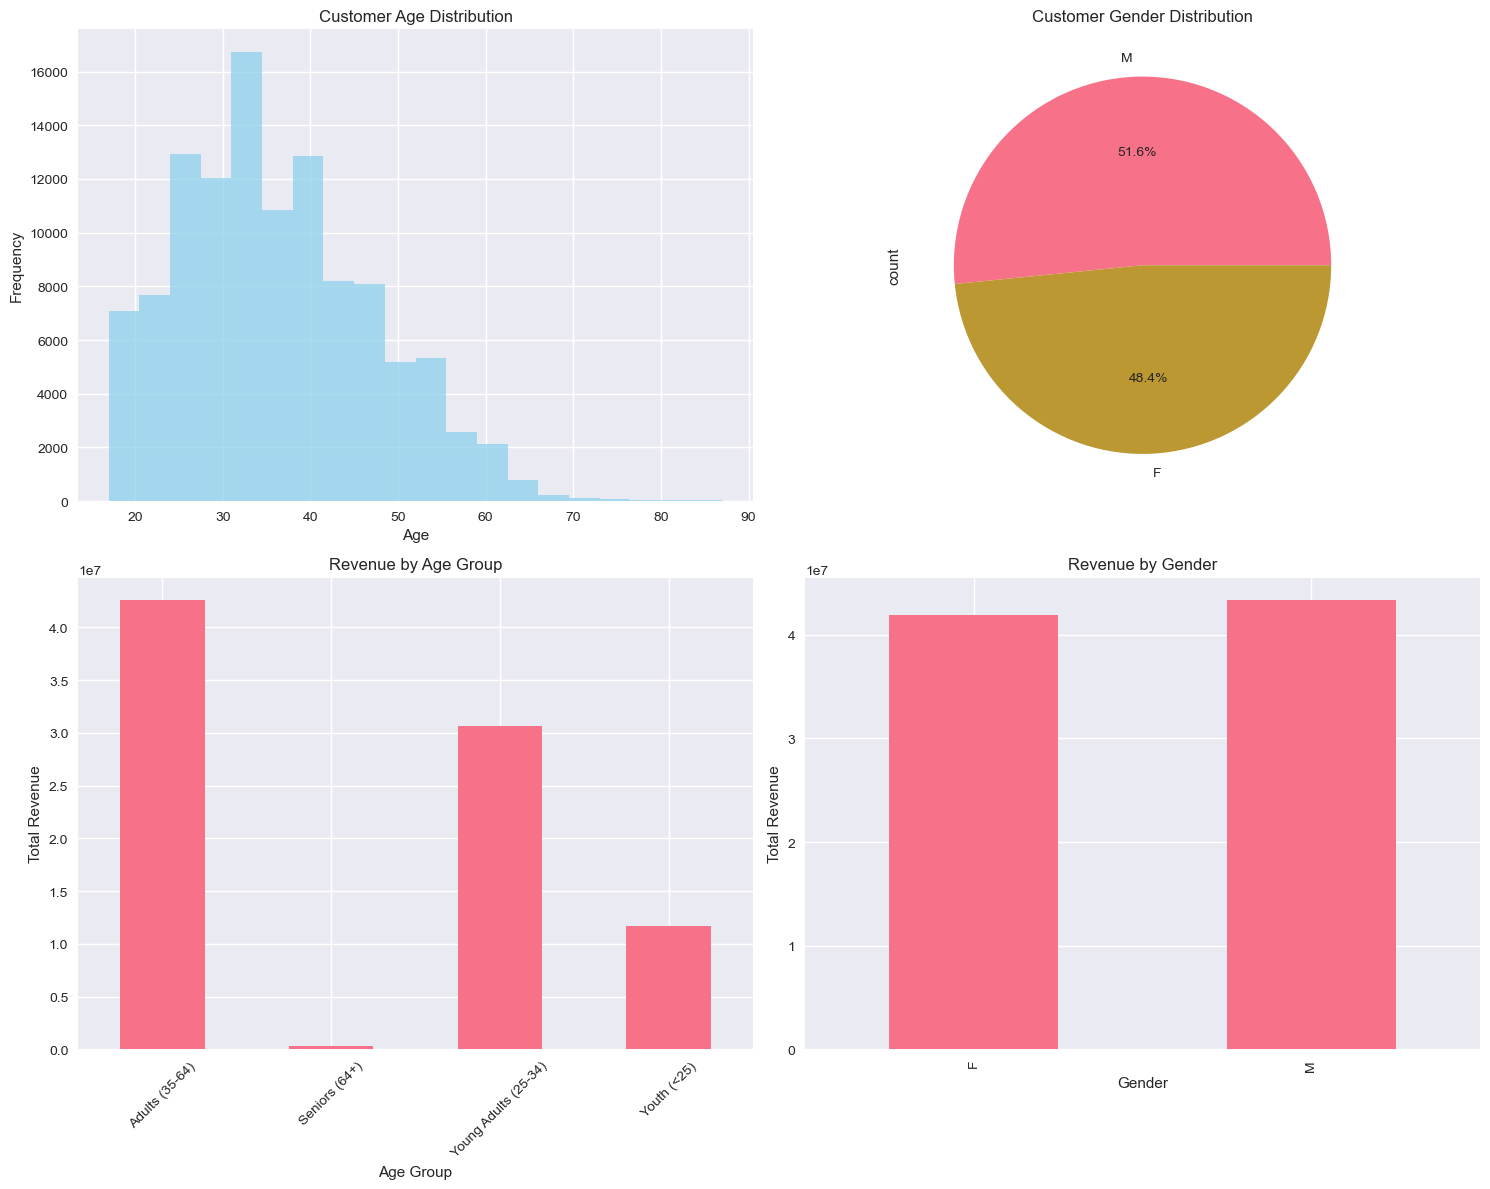

✓ Step 2 Complete: Customer demographics analysis finished
  - Visualization saved: customer_demographics.png

=== STEP 3: GEOGRAPHIC ANALYSIS ===
Analyzing sales performance by geographic location...

Top 10 Countries by Revenue:
                Total_Quantity  Total_Revenue  Order_Count
Country                                                   
United States           477539       27975547        39206
Australia               263585       21302059        23936
United Kingdom          157218       10646196        13620
Germany                 125720        8978596        11098
France                  128995        8432872        10998
Canada                  192259        7935738        14178

Top 10 States in United States by Revenue:
            Total_Quantity  Total_Revenue  Order_Count
State                                                 
California          269759       17672620        22450
Washington          137947        6741510        11264
Oregon               67012       

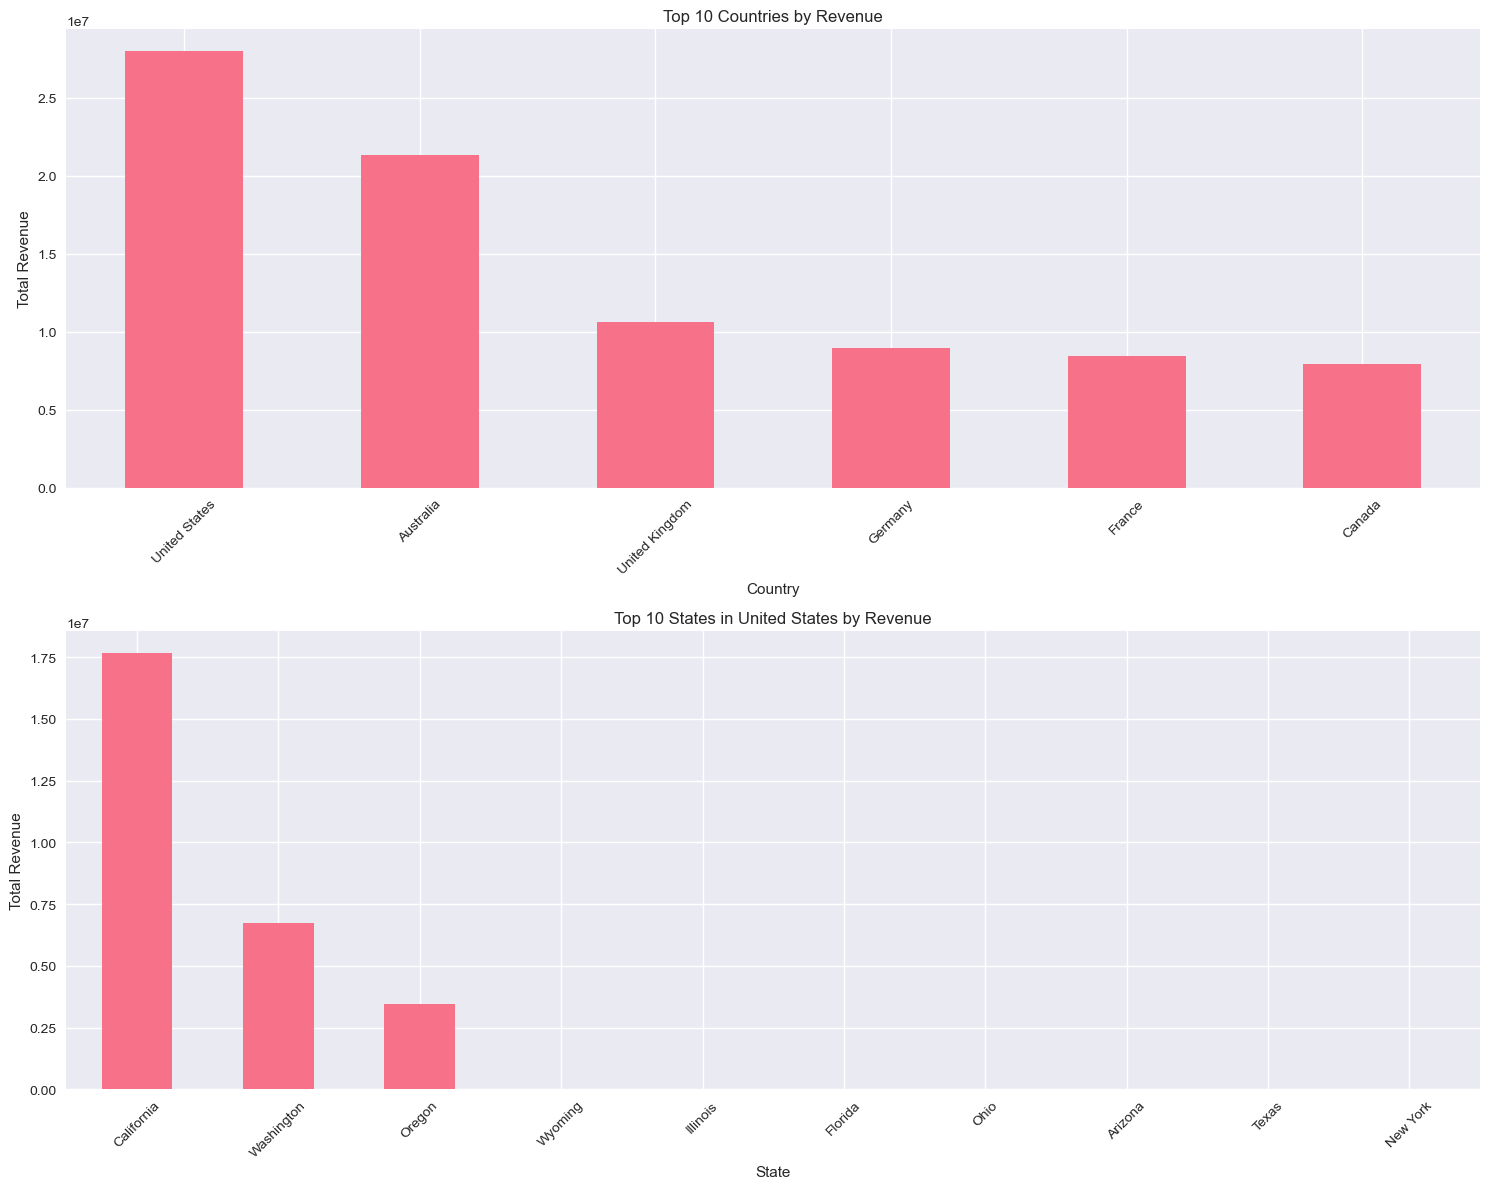

✓ Step 3 Complete: Geographic analysis finished
  - Visualization saved: geographic_analysis.png

=== STEP 4: PRODUCT CATEGORY ANALYSIS ===
Analyzing product categories and sub-categories...

Product Category Performance:
                  Total_Quantity  Total_Revenue  Total_Profit  Order_Count  \
Product_Category                                                             
Bikes                      36411       61782134      20519276        25982   
Accessories              1054162       15117992       8862377        70120   
Clothing                  254743        8370882       2839447        16934   

                  Profit_Margin  
Product_Category                 
Bikes                     33.21  
Accessories               58.62  
Clothing                  33.92  

Top 10 Sub-Categories by Revenue:
                                    Total_Quantity  Total_Revenue  \
Product_Category Sub_Category                                       
Bikes            Road Bikes                 

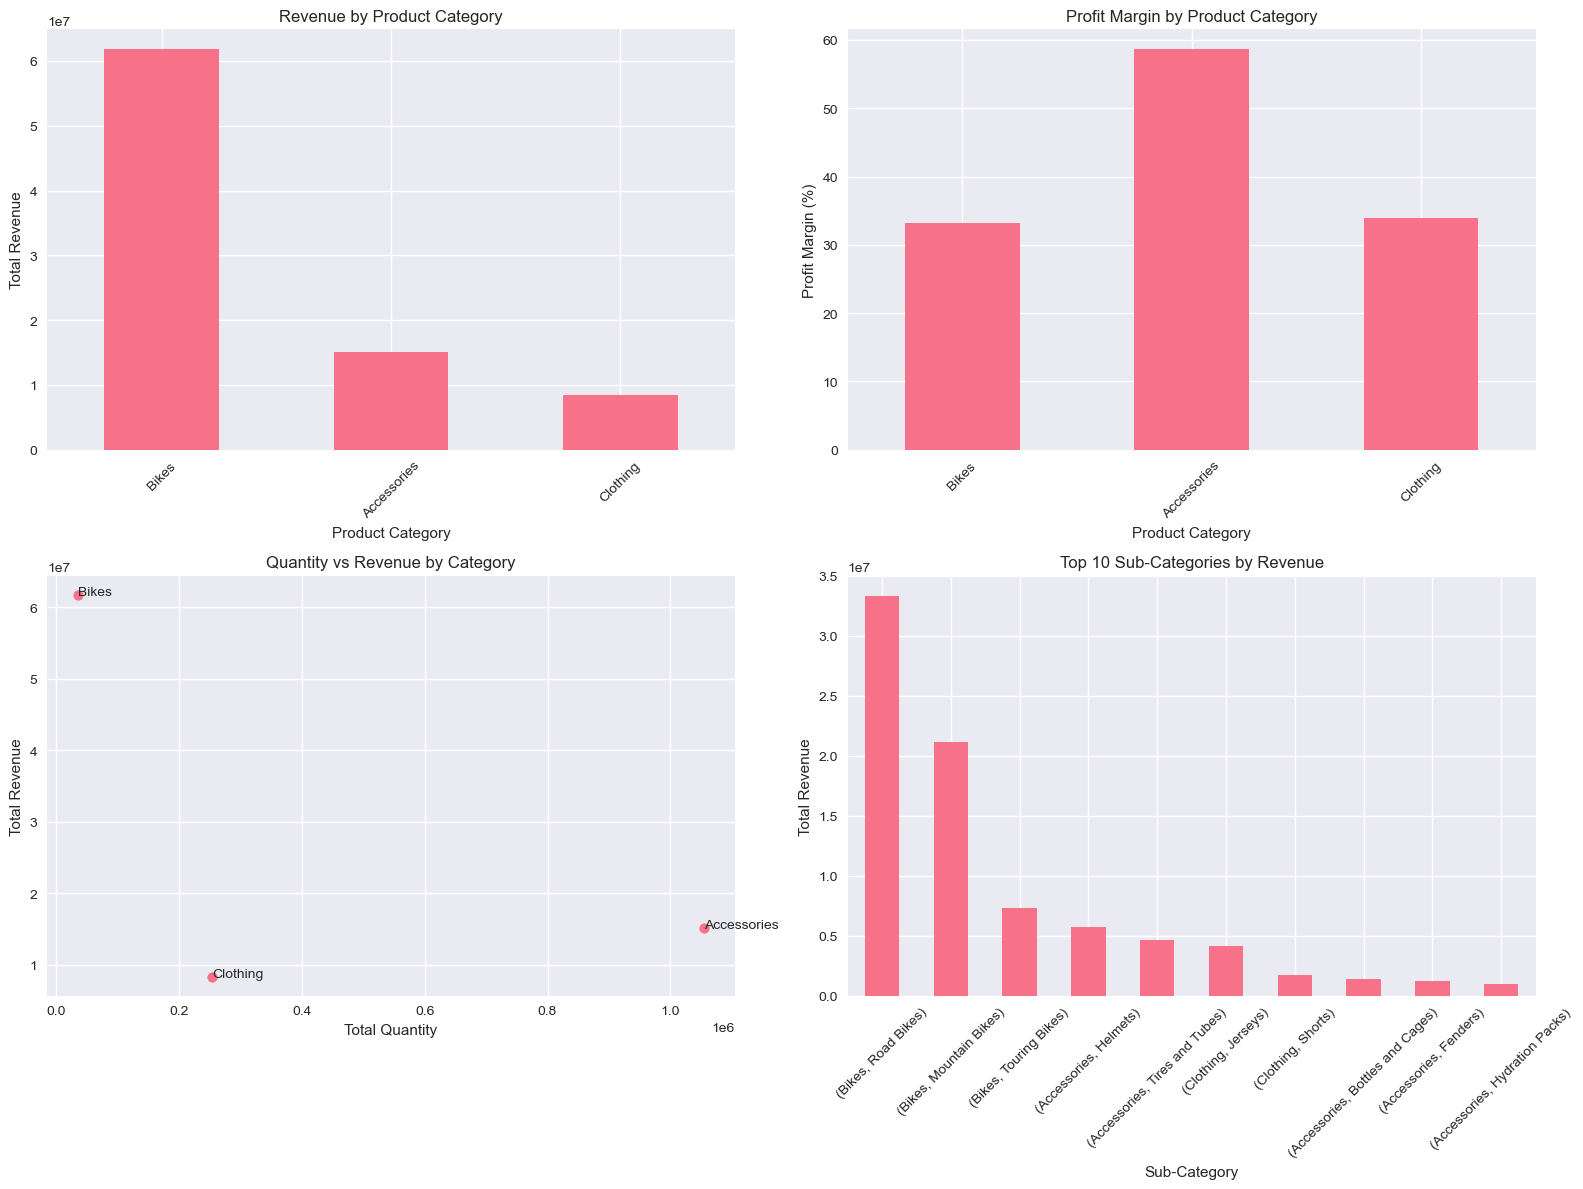

✓ Step 4 Complete: Product category analysis finished
  - Visualization saved: product_category_analysis.png

=== STEP 5: K-MEANS CUSTOMER SEGMENTATION ===
Performing customer segmentation using K-means clustering...
Preparing customer features for clustering...
Standardizing features for clustering...
Finding optimal number of clusters using elbow method...


  File "c:\Users\AmolChitale\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\AmolChitale\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\AmolChitale\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\AmolChitale\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Creating clustering optimization visualizations...


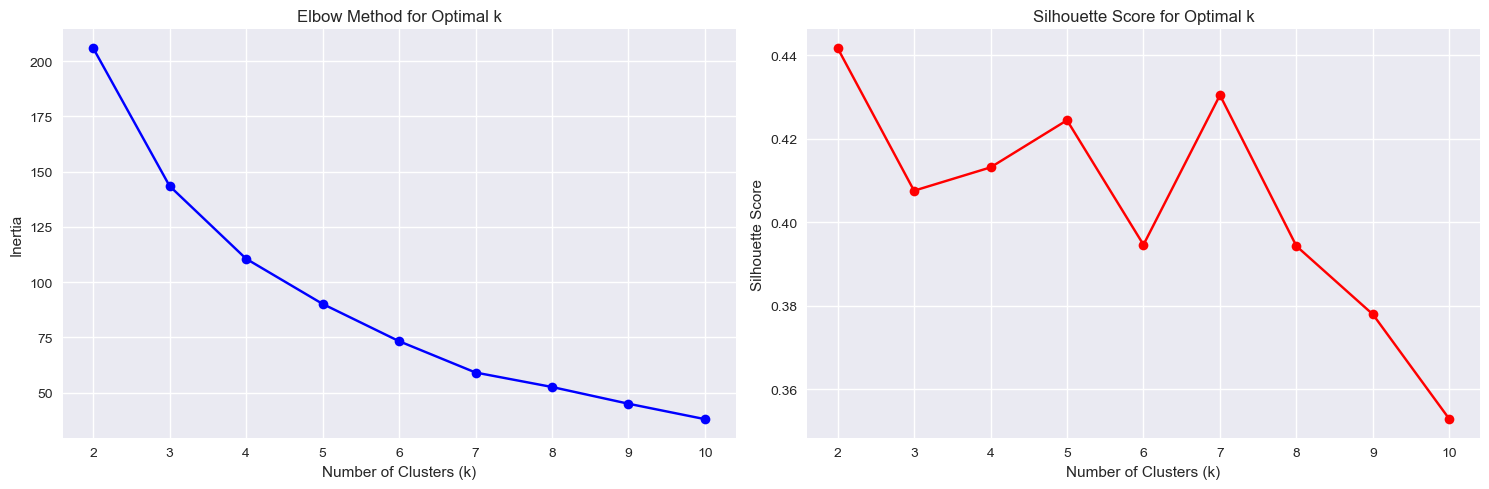

Using 4 clusters for customer segmentation...

Customer Segments (K=4):
         Customer_Age  Order_Quantity_sum  Order_Quantity_mean  Revenue_sum  \
Cluster                                                                       
0               73.82             1191.76                12.61     38732.71   
1               33.50            40516.09                11.66   2797137.14   
2               47.12            16611.35                12.52    886302.12   
3               78.40              361.40                19.86      6336.00   

         Revenue_mean  Profit_sum  Profit_mean  
Cluster                                         
0              306.23    17307.94       142.13  
1              808.52  1044909.41       302.38  
2              694.01   343114.04       274.56  
3              350.97     3578.60       199.29  
Creating customer segmentation visualizations...


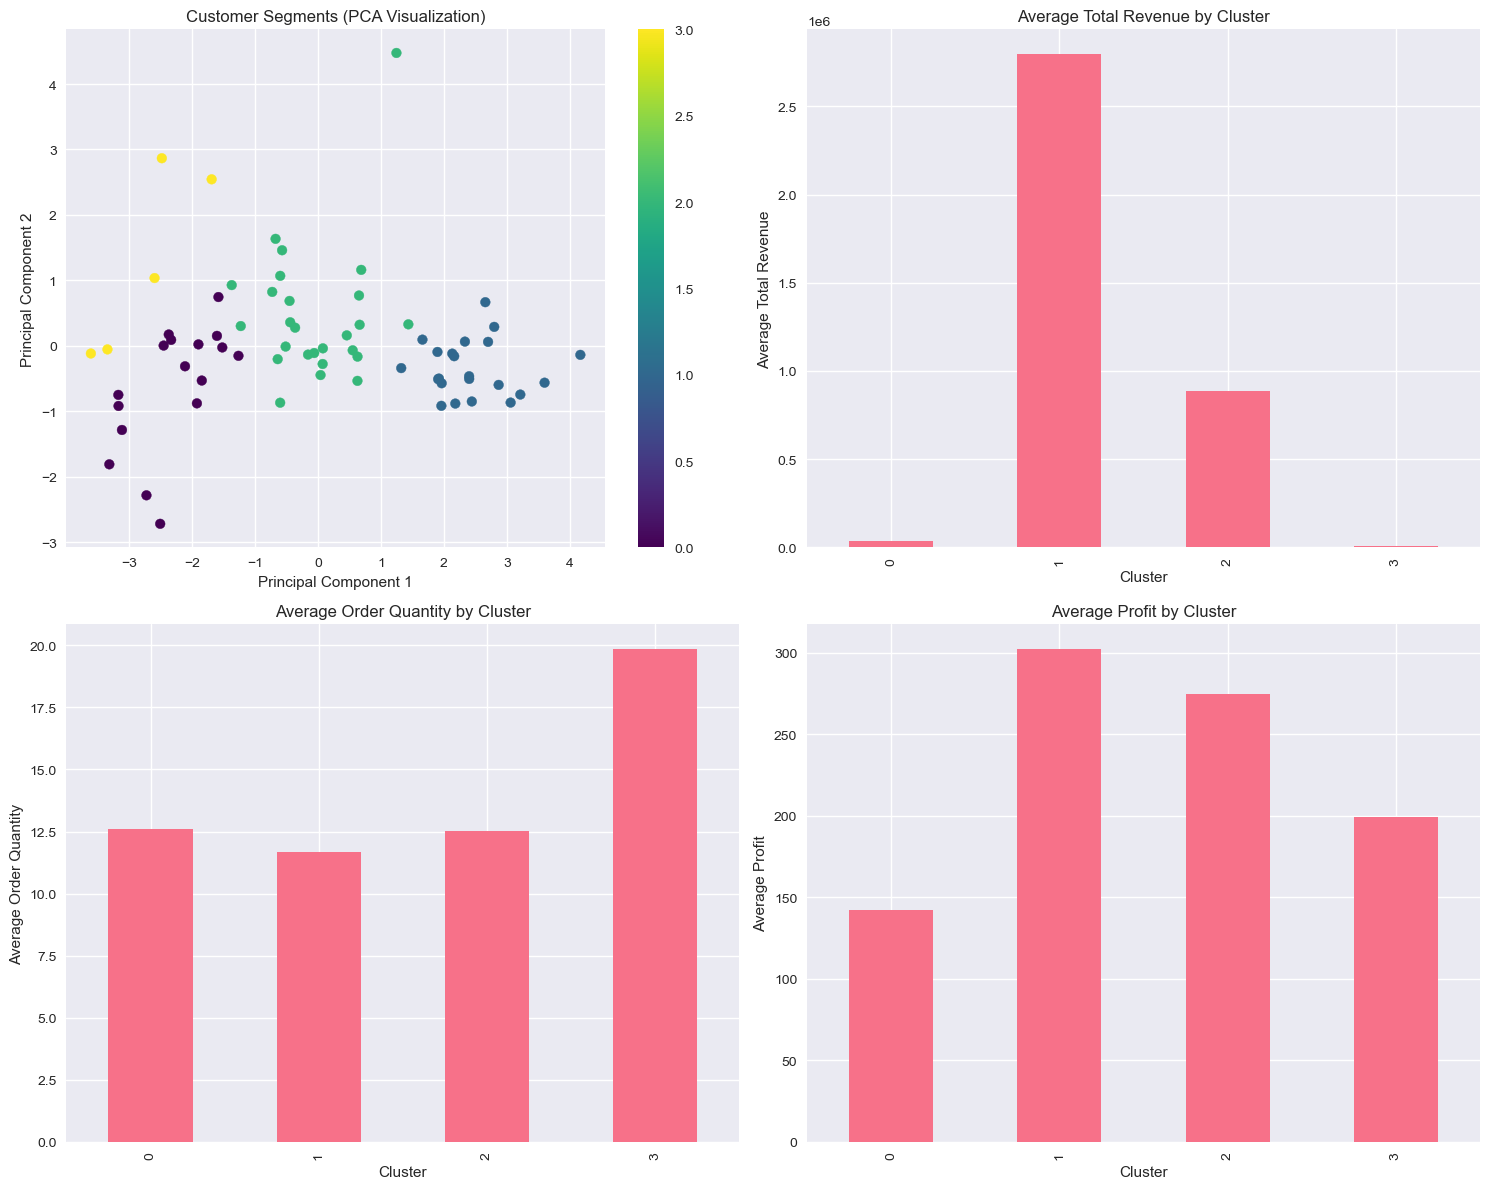


=== CUSTOMER SEGMENT INSIGHTS ===

Cluster 0:
  - Average Age: 73.8
  - Average Total Revenue: $38,732.71
  - Average Order Quantity: 12.61
  - Average Profit: $142.13
  - RECOMMENDATION: Lower-value customers - focus on increasing engagement

Cluster 1:
  - Average Age: 33.5
  - Average Total Revenue: $2,797,137.14
  - Average Order Quantity: 11.66
  - Average Profit: $302.38
  - RECOMMENDATION: High-value customers - focus on retention and upselling

Cluster 2:
  - Average Age: 47.1
  - Average Total Revenue: $886,302.12
  - Average Order Quantity: 12.52
  - Average Profit: $274.56
  - RECOMMENDATION: Lower-value customers - focus on increasing engagement

Cluster 3:
  - Average Age: 78.4
  - Average Total Revenue: $6,336.00
  - Average Order Quantity: 19.86
  - Average Profit: $199.29
  - RECOMMENDATION: Lower-value customers - focus on increasing engagement
✓ Step 5 Complete: Customer segmentation analysis finished
  - Visualizations saved: kmeans_optimization.png, customer_segmen

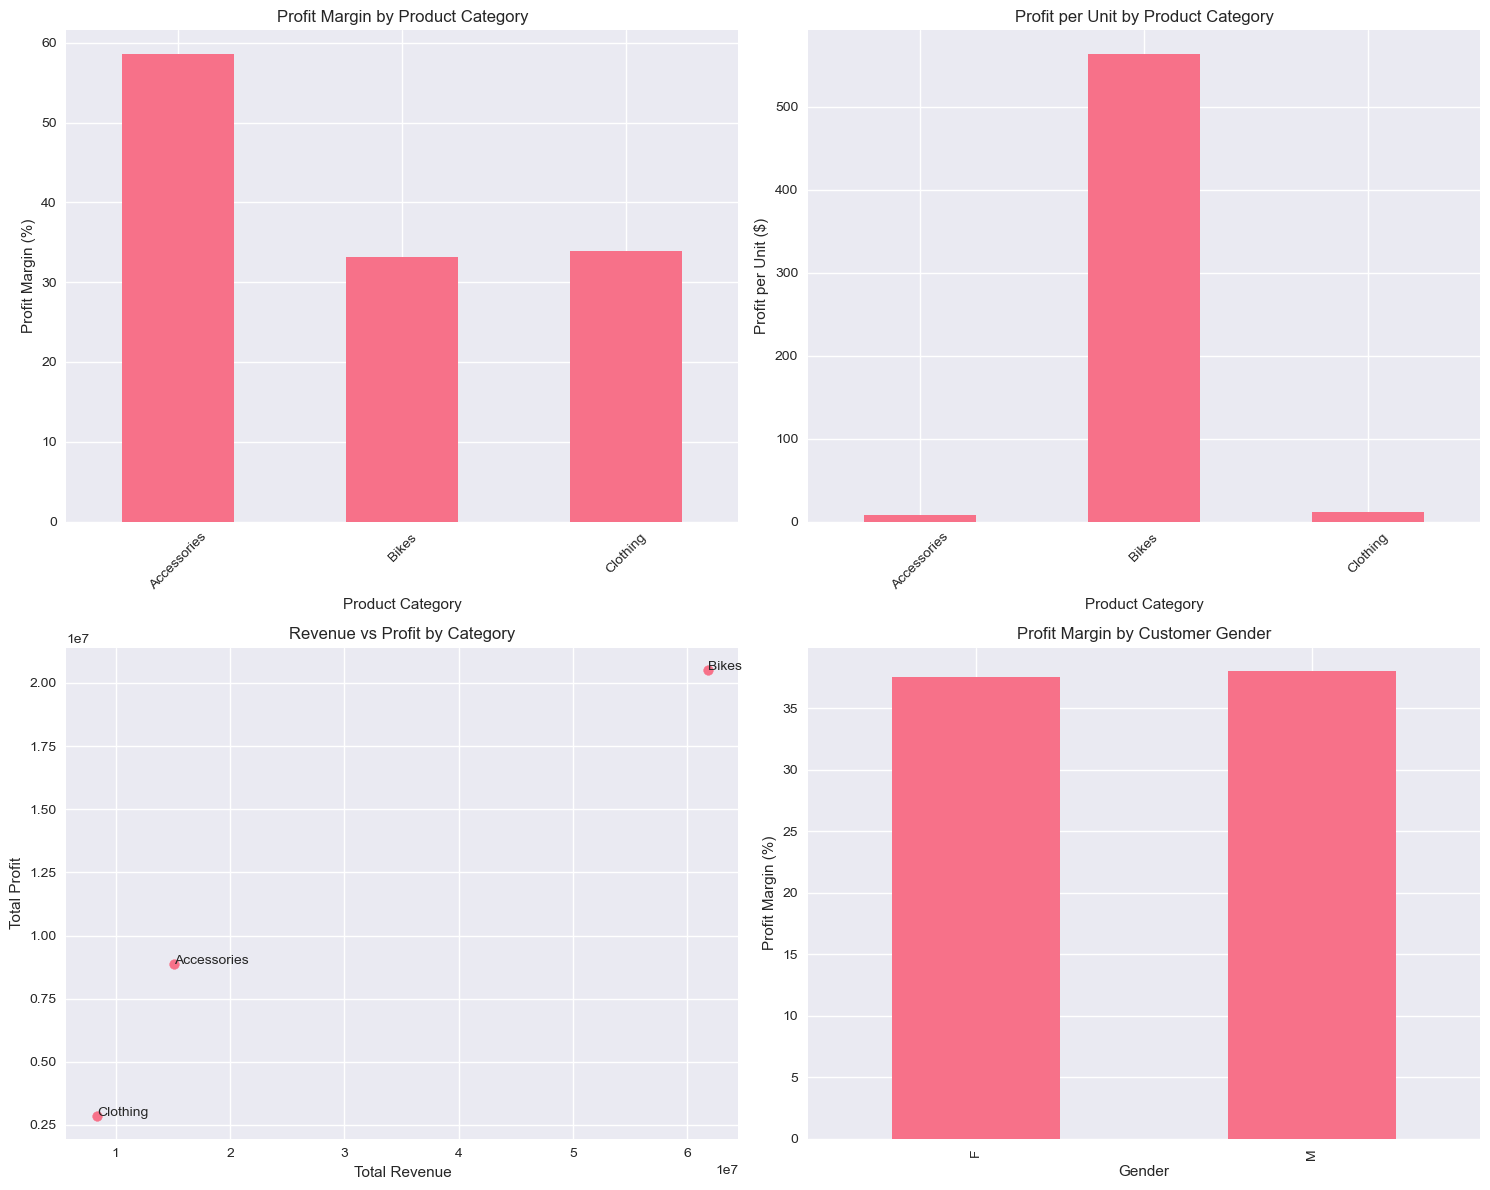

✓ Step 6 Complete: Profitability analysis finished
  - Visualization saved: profitability_analysis.png

=== STEP 7: COMPREHENSIVE BUSINESS REPORT ===
Generating comprehensive business report...

📊 EXECUTIVE SUMMARY
Total Sales Records: 113,036
Data Period: 2011-01-01 to 2016-07-31
Total Revenue: $85,271,008.00
Total Profit: $32,221,100.00
Overall Profit Margin: 37.79%
Unique Products: 3
Unique Customers (Age Groups): 4
Countries Served: 6

📈 KEY PERFORMANCE INDICATORS
Average Order Value: $754.37
Average Order Quantity: 11.90
Most Profitable Category: 20,519,276.00
Top Revenue Country: United States ($27,975,547.00)
Best Performing Age Group: Adults (35-64)

🎯 STRATEGIC RECOMMENDATIONS
1. PRODUCT STRATEGY:
   - Focus on Bikes (highest profit: $20,519,276.00)
   - Review Clothing performance (lowest profit: $2,839,447.00)
2. CUSTOMER TARGETING:
   - M customers generate highest revenue ($43,335,409.00)
3. MARKET EXPANSION:
   - Focus on United States ($27,975,547.00)
   - Explore opport

In [13]:
# =============================================================================
# MAIN EXECUTION FUNCTION
# =============================================================================
def main():
    """
    Main function to run the complete analysis (all steps)
    
    This function runs all 7 steps in sequence:
    1. Data Loading and Exploration
    2. Customer Demographics Analysis
    3. Geographic Analysis
    4. Product Category Analysis
    5. Customer Segmentation
    6. Profitability Analysis
    7. Comprehensive Report Generation
    """
    print("=== LAHN INC. COMPREHENSIVE SALES DATA ANALYSIS ===")
    print("Running complete analysis (all 7 steps)...")
    
    try:
        # Step 1: Load and explore data
        df = load_and_explore_data()
        
        # Convert date column
        df['Date'] = pd.to_datetime(df['Date'])
        
        # Step 2: Customer demographics analysis
        gender_sales, age_group_sales = customer_demographics_analysis(df)
        
        # Step 3: Geographic analysis
        country_sales, state_sales = geographic_analysis(df)
        
        # Step 4: Product category analysis
        category_sales, subcategory_sales = product_category_analysis(df)
        
        # Step 5: Customer segmentation
        customer_features, cluster_analysis = kmeans_customer_segmentation(df)
        
        # Step 6: Profitability analysis
        product_profit, customer_profit = profitability_analysis(df)
        
        # Step 7: Generate comprehensive report
        generate_comprehensive_report(df, gender_sales, age_group_sales, country_sales, category_sales, customer_features, product_profit)
        
        print("\n=== ANALYSIS COMPLETE ===")
        print("Generated files:")
        print("- customer_demographics.png: Customer analysis visualizations")
        print("- geographic_analysis.png: Geographic performance charts")
        print("- product_category_analysis.png: Product performance analysis")
        print("- kmeans_optimization.png: K-means clustering optimization")
        print("- customer_segmentation.png: Customer segmentation results")
        print("- profitability_analysis.png: Profitability analysis charts")
        print("- comprehensive_report.csv: Detailed business metrics")
        
    except Exception as e:
        print(f"Error during analysis: {str(e)}")
        print("Please check if the sales_data.csv file exists and has the expected format.")

# =============================================================================
# USAGE EXAMPLES
# =============================================================================
"""
# To run the complete analysis:
if __name__ == "__main__":
    main()

# To run individual steps:
if __name__ == "__main__":
    # Step 1: Load data
    df = run_step_1()
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Step 2: Customer demographics
    gender_sales, age_group_sales = run_step_2(df)
    
    # Step 3: Geographic analysis
    country_sales, state_sales = run_step_3(df)
    
    # Continue with other steps as needed...
"""

if __name__ == "__main__":
    main()